In [11]:
import sys
sys.path.append('..')
import import_ipynb
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet

In [12]:
# 하이퍼 파라미터 설정

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [13]:
# 데이터 읽기, 모델 준비

x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

In [20]:
for epoch in range(max_epoch):
    # 데이터 뒤섞기
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 정기적으로 학습 결과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 {} | 반복 {} / {} | 손실 {:.2f}'.format(epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0
            

| 에폭 1 | 반복 10 / 10 | 손실 0.05
| 에폭 2 | 반복 10 / 10 | 손실 0.06
| 에폭 3 | 반복 10 / 10 | 손실 0.05
| 에폭 4 | 반복 10 / 10 | 손실 0.05
| 에폭 5 | 반복 10 / 10 | 손실 0.05
| 에폭 6 | 반복 10 / 10 | 손실 0.05
| 에폭 7 | 반복 10 / 10 | 손실 0.05
| 에폭 8 | 반복 10 / 10 | 손실 0.05
| 에폭 9 | 반복 10 / 10 | 손실 0.05
| 에폭 10 | 반복 10 / 10 | 손실 0.05
| 에폭 11 | 반복 10 / 10 | 손실 0.05
| 에폭 12 | 반복 10 / 10 | 손실 0.05
| 에폭 13 | 반복 10 / 10 | 손실 0.05
| 에폭 14 | 반복 10 / 10 | 손실 0.05
| 에폭 15 | 반복 10 / 10 | 손실 0.05
| 에폭 16 | 반복 10 / 10 | 손실 0.05
| 에폭 17 | 반복 10 / 10 | 손실 0.05
| 에폭 18 | 반복 10 / 10 | 손실 0.05
| 에폭 19 | 반복 10 / 10 | 손실 0.05
| 에폭 20 | 반복 10 / 10 | 손실 0.05
| 에폭 21 | 반복 10 / 10 | 손실 0.05
| 에폭 22 | 반복 10 / 10 | 손실 0.05
| 에폭 23 | 반복 10 / 10 | 손실 0.05
| 에폭 24 | 반복 10 / 10 | 손실 0.05
| 에폭 25 | 반복 10 / 10 | 손실 0.05
| 에폭 26 | 반복 10 / 10 | 손실 0.04
| 에폭 27 | 반복 10 / 10 | 손실 0.05
| 에폭 28 | 반복 10 / 10 | 손실 0.05
| 에폭 29 | 반복 10 / 10 | 손실 0.05
| 에폭 30 | 반복 10 / 10 | 손실 0.05
| 에폭 31 | 반복 10 / 10 | 손실 0.05
| 에폭 32 | 반복 10 / 10 | 손실 0.05
| 에폭 33 | 반복 10 /

| 에폭 290 | 반복 10 / 10 | 손실 0.04
| 에폭 291 | 반복 10 / 10 | 손실 0.04
| 에폭 292 | 반복 10 / 10 | 손실 0.04
| 에폭 293 | 반복 10 / 10 | 손실 0.04
| 에폭 294 | 반복 10 / 10 | 손실 0.04
| 에폭 295 | 반복 10 / 10 | 손실 0.04
| 에폭 296 | 반복 10 / 10 | 손실 0.04
| 에폭 297 | 반복 10 / 10 | 손실 0.04
| 에폭 298 | 반복 10 / 10 | 손실 0.04
| 에폭 299 | 반복 10 / 10 | 손실 0.04
| 에폭 300 | 반복 10 / 10 | 손실 0.04


# 그래프 그리기

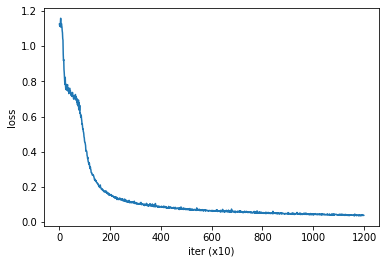

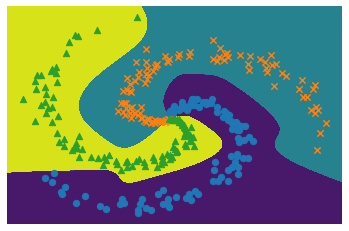

In [21]:
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iter (x10)')
plt.ylabel('loss')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()
